In [1]:
import os
import ee
import datetime
import numpy as np
import rsfuncs as rs
import geopandas as gp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage.measure import regionprops
from skimage import filters

import scipy.ndimage as ndi 

ee.Initialize()

In [2]:
def count_vertices(gdf):
    for i, row in gdf.iterrows():
    # It's better to check if multigeometry
        multi = row.geometry.type.startswith("Multi")

        if multi:
            n = 0
            # iterate over all parts of multigeometry
            for part in row.geometry:
                n += len(part.exterior.coords)
        else: # if single geometry like point, linestring or polygon
            n = len(row.geometry.exterior.coords)

    print(n)


153


/Users/aakashahamed/anaconda3/envs/rsenv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


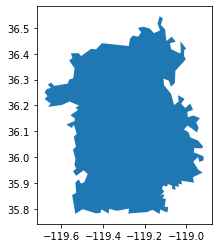

In [6]:
# Read shapefile 
gdf = gp.read_file("../shape/kb_rpj.shp")

# calc area 
tgdf = gdf.copy()
tgdf = tgdf.to_crs({'init': 'epsg:26910'})
area_m2 = tgdf.area
area_km2 = tgdf.area * 1e-6 # sq m to sq km
area_ac = area_km2 * 247.105 # sq km to acres 

# Get geom 
gdf.geometry = gdf.simplify(0.005)
count_vertices(gdf)
gdf.plot()
area = rs.gdf_to_ee_poly(gdf)



In [7]:
data = rs.load_data()

In [10]:
startdate = datetime.datetime.strptime('2010-10-01', "%Y-%m-%d")
enddate = datetime.datetime.strptime('2019-09-30', "%Y-%m-%d")

In [11]:
chirps = rs.get_ims(data['chirps'], startdate, enddate, area)

processing:
UCSB-CHG/CHIRPS/PENTAD/19810101


  0%|          | 0/108 [00:00<?, ?it/s]

postprocesing


  0%|          | 0/108 [00:00<?, ?it/s]

====COMPLETE=====


<ipython-input-12-97b0b07d8bff>:1: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(np.dstack(chirps), axis = 2))


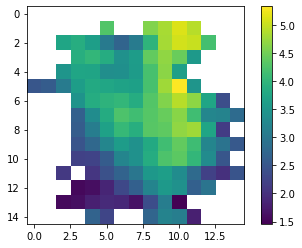

In [12]:
plt.imshow(np.nanmean(np.dstack(chirps), axis = 2))
plt.colorbar()

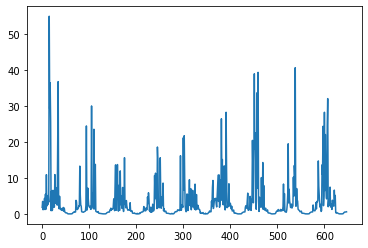

In [13]:
charr = np.dstack(chirps)
imsums = [np.nanmean(charr[:,:,x]) for x in range(charr.shape[2])]
plt.plot(imsums)

6.864018449839547 7.733849429002461


<ipython-input-14-84223a820d85>:1: RuntimeWarning: Mean of empty slice
  temp = np.nanmean(charr[:,:,:50], axis = 2).astype(np.float64)


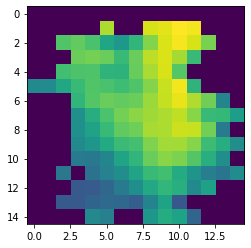

In [14]:
temp = np.nanmean(charr[:,:,:50], axis = 2).astype(np.float64)
t2 = np.nan_to_num(temp)
cy, cx = ndi.center_of_mass(t2)

print(cy,cx)
plt.imshow(t2)

<ipython-input-66-97b0b07d8bff>:1: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(np.dstack(chirps), axis = 2))


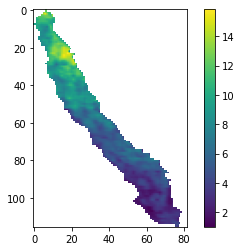

In [66]:
plt.imshow(np.nanmean(np.dstack(chirps), axis = 2))
plt.colorbar()

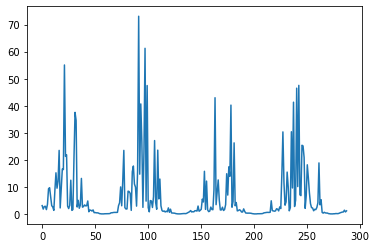

In [69]:
charr = np.dstack(chirps)
imsums = [np.nanmean(charr[:,:,x]) for x in range(charr.shape[2])]
plt.plot(imsums)

48.67220765817225 29.352607466655893


<ipython-input-72-3f1edff3cb4d>:2: RuntimeWarning: Mean of empty slice
  temp = np.nanmean(charr[:,:,:50], axis = 2).astype(np.float64)


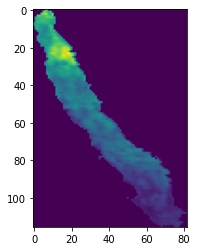

In [72]:
temp = np.nanmean(charr[:,:,:50], axis = 2).astype(np.float64)
t2 = np.nan_to_num(temp)
cy, cx = ndi.center_of_mass(t2)

print(cy,cx)
plt.imshow(t2)

47.17621310402837 27.332111514920033


<ipython-input-81-7b9f15ac61f3>:1: RuntimeWarning: Mean of empty slice
  temp = np.nanmean(charr[:,:,75:77], axis = 2).astype(np.float64)


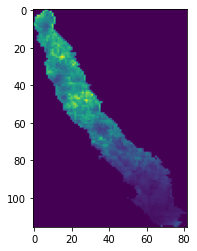

In [81]:
temp = np.nanmean(charr[:,:,75:77], axis = 2).astype(np.float64)
t2 = np.nan_to_num(temp)
cy, cx = ndi.center_of_mass(t2)

print(cy,cx)
plt.imshow(t2)

In [52]:
t2 = np.nan_to_num(temp)

In [57]:
cy, cx = ndi.center_of_mass(t2)

print(cy,cx)

49.54875651760024 29.757955079479345


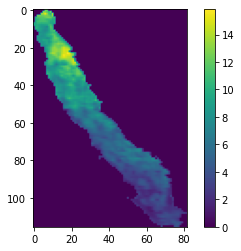

In [56]:
plt.imshow(t2)
plt.colorbar()

In [82]:


image = t2.copy()

threshold_value = filters.threshold_otsu(image)
labeled_foreground = (image > threshold_value).astype(int)
properties = regionprops(labeled_foreground, image)
center_of_mass = properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid

print(center_of_mass)
plt.imshow(labeled_foreground)
plt.colorbar()

(43.41519570222563, 24.313891020721414)


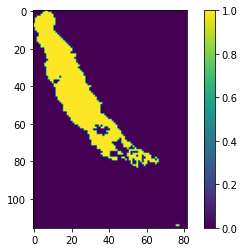

In [85]:
plt.imshow(labeled_foreground)
plt.colorbar()

In [86]:
threshold_value

5.671174641698599

In [9]:
np.save("../data/ssm.npy", np.dstack(smap_ssm))

In [ ]:
smap_subsm = rs.get_ims(data['smap_susm'], startdate, enddate, area)

processing:


  0%|          | 0/48 [00:00<?, ?it/s]

NASA_USDA/HSL/SMAP10KM_soil_moisture/NASA_USDA_SMAP_SM20150402_20150404


 92%|█████████▏| 44/48 [00:33<00:02,  1.43it/s]

In [ ]:
plt.imshow(np.nanmean(np.dstack(smap_subsm), axis = 2))
plt.colorbar()

In [ ]:
np.save("../data/subsm.npy", np.dstack(smap_ssm))